In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
data = pd.read_csv(r"..\data\part_2\daily_data_cleaned.csv")
data.head()

,day_id,city_id,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,condition_text
0,D0003,0,20.0,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,3
1,D0004,0,17.0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,0
2,D0007,0,21.0,4.0,310,1015.0,0.0,100,50,21.0,10.0,1.0,15.1,2,6
3,D0019,0,19.0,3.6,64,1017.0,0.0,88,0,19.0,10.0,1.0,8.3,3,0
4,D0028,1,19.0,3.6,83,1010.0,0.0,73,25,19.0,10.0,1.0,8.3,1,6


In [3]:
le = LabelEncoder().fit(pickle.load(open(r"..\models\label_encoder.pkl", "rb")))

In [4]:
# Splitting the data into X and y
X = data.drop(columns=["day_id", "condition_text"])
y = data["condition_text"]

In [5]:
# Balancing the data by oversampling
smote = SMOTE()

X, y = smote.fit_resample(X, y)

In [6]:
y.dtype

dtype('int64')

In [7]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y.value_counts()

condition_text
3    122
0    122
6    122
2    122
1    122
4    122
7    122
5    122
8    122
Name: count, dtype: int64

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [10]:
# class_names = [0,1,2,3,4,5,6,7,8]

# num_classes = len(class_names)
# y_train = pd.Categorical(y_train, categories=class_names).codes
# y_val = pd.Categorical(y_val, categories=class_names).codes

# # Compute class weights
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

In [11]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

d:\Predicta\Predicta_Solutions\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=275,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1414 - loss: 2.3019 - val_accuracy: 0.2409 - val_loss: 2.1086
Epoch 2/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2024 - loss: 2.1507 - val_accuracy: 0.3318 - val_loss: 1.9766
Epoch 3/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2308 - loss: 2.0505 - val_accuracy: 0.4000 - val_loss: 1.8681
Epoch 4/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 1.9025 - val_accuracy: 0.4773 - val_loss: 1.7673
Epoch 5/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 1.8730 - val_accuracy: 0.5182 - val_loss: 1.6737
Epoch 6/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3747 - loss: 1.7339 - val_accuracy: 0.5273 - val_loss: 1.5865
Epoch 7/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.6824 - val_accuracy: 0.5591 - val_loss: 1.5042
Epoch 8/275
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4383 - loss: 1.6240 - val_accuracy: 0.5773 - v

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8338 - loss: 0.5747  
Validation Accuracy: 0.85


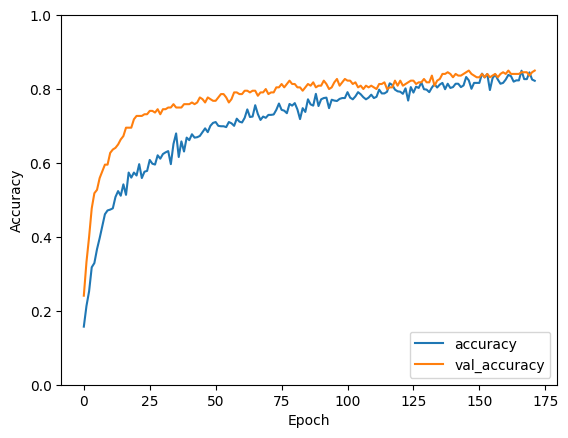

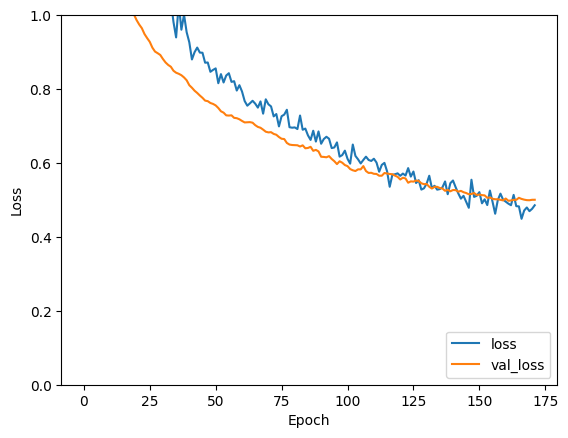

In [14]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(X_val), axis=1)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[29  0  0  0  1  0  2  0  0]
 [ 0 23  0  0  0  0  3  0  0]
 [ 0  1 18  1  0  0  5  1  0]
 [ 0  0  0 16  0  0  0  2  0]
 [ 2  1  1  0 25  0  0  0  1]
 [ 0  0  0  0  0 22  0  0  0]
 [ 4  0  1  1  0  1 13  1  0]
 [ 0  0  1  0  0  0  0 22  0]
 [ 0  0  0  3  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.92      0.88      0.90        26
           2       0.86      0.69      0.77        26
           3       0.76      0.89      0.82        18
           4       0.96      0.83      0.89        30
           5       0.96      1.00      0.98        22
           6       0.57      0.62      0.59        21
           7       0.85      0.96      0.90        23
           8       0.95      0.86      0.90        22

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.86      0.85      0.

In [16]:
# Training accuracy
y_pred_train = np.argmax(model.predict(X_train), axis=1)
# Teating accuracy
y_pred_val = np.argmax(model.predict(X_val), axis=1)

# Print the accuracy score
print(f"Training accuracy: {np.mean(y_train == y_pred_train)}")
print(f"Validation accuracy: {np.mean(y_val == y_pred_val)}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training accuracy: 0.9236902050113895
Validation accuracy: 0.85


In [17]:
# Get the predictions
predictions = pd.read_csv(r"..\data\part_2\predict_data.csv")

In [18]:
X_pred = predictions.drop(columns=["day_id"])

In [19]:
# Standardize the features
X_pred = scaler.transform(X_pred)

# Make predictions
y_pred = np.argmax(model.predict(X_pred), axis=1)

# Inverse transform the predictions
predictions["condition_text"] = le.inverse_transform(y_pred)

predictions

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


,day_id,city_id,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,condition_text
0,D0001,0,27.0,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,Light Precipitation
1,D0002,0,22.0,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,Cloudy and Overcast
2,D0005,0,18.0,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,Clear and Sunny
3,D0006,0,20.0,3.6,96,1019.0,0.0,88,0,20.0,10.0,1.0,11.2,1,Clear and Sunny
4,D0008,0,21.0,20.2,330,1011.0,0.0,53,75,21.0,10.0,1.0,17.3,1,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,D2888,111,19.5,16.6,113,1015.0,0.0,38,0,19.5,10.0,1.0,26.7,1,Clear and Sunny
2410,D2890,111,17.4,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,Clear and Sunny
2411,D2891,111,19.2,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,Clear and Sunny
2412,D2892,111,19.2,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,Clear and Sunny


In [20]:
predictions[["day_id", "condition_text"]]

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
2,D0005,Clear and Sunny
3,D0006,Clear and Sunny
4,D0008,Partly Cloudy
...,...,...
2409,D2888,Clear and Sunny
2410,D2890,Clear and Sunny
2411,D2891,Clear and Sunny
2412,D2892,Clear and Sunny


In [21]:
submission = pd.read_csv(r"..\data\part_2\submission.csv")
submission

,day_id,condition_text
0,D0001,NaN
1,D0002,NaN
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,NaN
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,NaN
2890,D2891,NaN
2891,D2892,NaN


In [22]:
# Left join the submission and predictions dataframes in one column
submission = submission.merge(predictions[["day_id", "condition_text"]], on="day_id", how="left")

In [23]:
# condition_text_y and condition_text_x fill with the values of condition_text_y
submission["condition_text"] = submission["condition_text_x"].fillna(submission["condition_text_y"])
submission

,day_id,condition_text_x,condition_text_y,condition_text
0,D0001,NaN,Light Precipitation,Light Precipitation
1,D0002,NaN,Cloudy and Overcast,Cloudy and Overcast
2,D0003,Light Rain with Thunder,NaN,Light Rain with Thunder
3,D0004,Clear and Sunny,NaN,Clear and Sunny
4,D0005,NaN,Clear and Sunny,Clear and Sunny
...,...,...,...,...
2888,D2889,Clear and Sunny,NaN,Clear and Sunny
2889,D2890,NaN,Clear and Sunny,Clear and Sunny
2890,D2891,NaN,Clear and Sunny,Clear and Sunny
2891,D2892,NaN,Clear and Sunny,Clear and Sunny


In [24]:
submission.drop(columns=["condition_text_x", "condition_text_y"], inplace=True)
submission

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


In [25]:
submission.to_csv(r"..\data\part_2\submission_lstm.csv", index=False)